In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


algorithmType=SteadyStateGA
populationSize=100
stagnancyThreshold=250
wipeoutThreshold=500
epurationDegree=0.7
epochs=-1
elitism=0
replacementNumber=25
crossover=CrossoverAverageWeighted
mutationSigma=0.01
mutationProbability=1.0
mutation=MutationGaussian
parentsNumber=2
selectionPressure=1.75
selection=SelectionLinearRanking
survival=SurvivalBestFitness
best fitness: 0.0022574262281451055


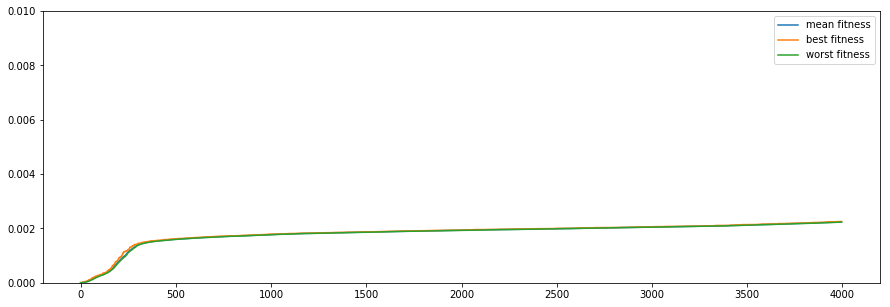

In [6]:
mean_fitness = []
best_fitness = []
worst_fitness = []

properties = False
properties_finished = False
scores = False
scores_finished = False
with open('logs/last_run.log') as f:
    for line in f.readlines():
        line = line.replace('\n', '')
        if line == "Properties:":
            properties = True
        elif line == "EndProperties":
            properties = False
            properties_finished = True
        elif line == "Scores:":
            scores = True
            mean_fitness.append([])
            best_fitness.append([])
            worst_fitness.append([])
        elif line == "EndScores":
            scores = False
            scores_finished = True
        elif properties and not properties_finished:
            print line
        elif scores:
            line = line.replace(',', '').split()
            mean_fitness[-1].append(line[1])
            best_fitness[-1].append(line[2])
            worst_fitness[-1].append(line[3])

for i in range(len(mean_fitness)):
    figure(figsize=(15, 5))
    print "best fitness:", best_fitness[i][-1]
    plot(mean_fitness[i], label="mean fitness")
    plot(best_fitness[i], label="best fitness")
    plot(worst_fitness[i], label="worst fitness")
    plt.legend()
    plt.ylim(0, 0.01)